In [52]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [139]:
# load dataset
data = pd.read_csv('..\input\indians.csv', header=None)
values = data.values

In [47]:
data.shape

(768, 9)

In [23]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)

In [28]:

#run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    stats.append(score)

0.695931477516
0.671610169492
0.686021505376
0.671610169492
0.749460043197
0.698072805139
0.690831556503
0.712719298246
0.706751054852
0.715517241379
0.68898488121
0.703157894737
0.739406779661
0.660980810235
0.622601279318
0.670190274841
0.648068669528
0.72647702407
0.708971553611
0.704641350211
0.719827586207
0.709327548807
0.671706263499
0.677754677755
0.699346405229
0.700873362445
0.704103671706
0.65376344086
0.696202531646
0.723311546841
0.641468682505
0.660944206009
0.686147186147
0.705756929638
0.679569892473
0.69247311828
0.652452025586
0.696120689655
0.732456140351
0.712418300654
0.699134199134
0.666666666667
0.653276955603
0.691176470588
0.728051391863
0.683297180043
0.685534591195
0.676086956522
0.673819742489
0.680942184154
0.675906183369
0.688596491228
0.7096069869
0.721982758621
0.646288209607
0.66452991453
0.714902807775
0.673819742489
0.674832962138
0.674672489083
0.681720430108
0.65611814346
0.653104925054
0.693617021277
0.712418300654
0.71186440678
0.664556962025
0.69

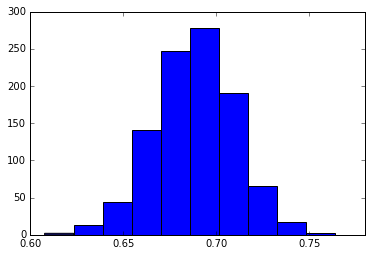

95.0 confidence interval 64.3% and 73.1%


In [33]:

pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Boosting

In [110]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

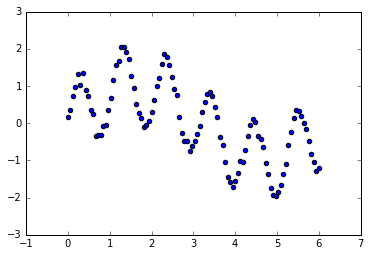

In [111]:
plt.scatter(X,y)

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [113]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000000000B1DA090>)

In [114]:
print(regr_1.score(X,y),regr_2.score(X,y))

0.856924097598 0.975546179579


In [118]:
from sklearn.svm import SVR

regr_3 = SVR()
regr_4 = AdaBoostRegressor(regr_3,
                          n_estimators=300, random_state=rng)

regr_3.fit(X, y)
regr_4.fit(X, y)

AdaBoostRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000000000B1DA090>)

In [119]:
print(regr_3.score(X,y),regr_4.score(X,y))

0.527141002325 0.637397920425


In [125]:
DecisionTreeRegressor?

In [132]:
regr_1.tree_.children_left

array([ 1,  2,  3,  4, -1, -1,  7, -1, -1, 10, 11, -1, -1, 14, -1, -1, 17,
       18, 19, -1, -1, 22, -1, -1, 25, 26, -1, -1, 29, -1, -1], dtype=int64)

In [138]:
import graphviz
export_graphviz(regr_,out_file=None)  

ImportError: No module named 'graphviz'